# EXPLORATORY DATA ANALYSIS 1

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

## TAKEN FROM https://stats.stackexchange.com/questions/403652/two-sample-quantile-quantile-plot-in-python
## Solution provided by user: Artem Mavrin
def qqplot(x, y, quantiles=None, interpolation='nearest', ax=None, rug=False,
           rug_length=0.05, rug_kwargs=None, **kwargs):
    """Draw a quantile-quantile plot for `x` versus `y`.

    Parameters
    ----------
    x, y : array-like
        One-dimensional numeric arrays.

    ax : matplotlib.axes.Axes, optional
        Axes on which to plot. If not provided, the current axes will be used.

    quantiles : int or array-like, optional
        Quantiles to include in the plot. This can be an array of quantiles, in
        which case only the specified quantiles of `x` and `y` will be plotted.
        If this is an int `n`, then the quantiles will be `n` evenly spaced
        points between 0 and 1. If this is None, then `min(len(x), len(y))`
        evenly spaced quantiles between 0 and 1 will be computed.

    interpolation : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
        Specify the interpolation method used to find quantiles when `quantiles`
        is an int or None. See the documentation for numpy.quantile().

    rug : bool, optional
        If True, draw a rug plot representing both samples on the horizontal and
        vertical axes. If False, no rug plot is drawn.

    rug_length : float in [0, 1], optional
        Specifies the length of the rug plot lines as a fraction of the total
        vertical or horizontal length.

    rug_kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.axvline() and
        matplotlib.axes.Axes.axhline() when drawing rug plots.

    kwargs : dict of keyword arguments
        Keyword arguments to pass to matplotlib.axes.Axes.scatter() when drawing
        the q-q plot.
    """
    import numbers
    import numpy as np
    # Get current axes if none are provided
    if ax is None:
        ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))
        

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation=interpolation)
    y_quantiles = np.quantile(y, quantiles, interpolation=interpolation)

    minimum=np.min([np.min(x),np.min(y)])
    maximum=np.max([np.max(x),np.max(y)])

    # Draw the rug plots if requested
    if rug:
        # Default rug plot settings
        rug_x_params = dict(ymin=0, ymax=rug_length, c='gray', alpha=0.5)
        rug_y_params = dict(xmin=0, xmax=rug_length, c='gray', alpha=0.5)

        # Override default setting by any user-specified settings
        if rug_kwargs is not None:
            rug_x_params.update(rug_kwargs)
            rug_y_params.update(rug_kwargs)

        # Draw the rug plots
        for point in x:
            ax.axvline(point, **rug_x_params)
        for point in y:
            ax.axhline(point, **rug_y_params)

    # Draw the q-q plot
    print(f'Number of quantiles: {len(quantiles)}')
    ax.scatter(x_quantiles, y_quantiles, **kwargs)
    ax.axline([minimum, minimum], [maximum, maximum], color='k')

Mount google drive

Use Kaggle username and key

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'cchristianvw'
os.environ['KAGGLE_KEY'] = '1aa65819dc00a2b28c45d12d55b4760b'


In [2]:
!pip install kaggle

In [39]:
os.chdir('/Users/chris/Notes/masters/BigDataAnalytics/Lab/')

In [40]:
!kaggle competitions download -c titanic
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd

df=pd.read_csv('/Users/chris/Notes/masters/BigDataAnalytics/Lab/eda/train.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Excercise:

* Consider the columns ['Survived',	'Pclass', 'Sex',	'Age',	'SibSp',	'Parch', 'Fare', Embarked']. Also said: ignore ['Ticket','Cabin'].
* Plot the distribution of the previous features using histograms (numerical, ordinal) or barplot (nominal or ordinal).  Mind that showing the barplot of nominal attributes requires first to get their value_counts distribution using: df['nominal_attribute'].value_counts().plot(kind='bar').
* Understand what may be the best option for measuring attribute centrality and dispersion (if needed) and compute them.
* Use a box plot to summarize the 'Fare' attribute. Do it again but grouping by the 'Survived' outcome. Does money buy safety (at least to some degree)?
* Split the dataset into Male and Female passengers and display a qq-plot of the 'Fare' attribute comparing the two groups. What does it mean? Is it possible to find a simple reason why this is the result or not?
* Plot a stratified barplot: the barplot should have on the x axis the 'Embarked' attribute and be stratified by the 'Pclass' attribute. Given that C = Cherbourg (France) , Q = Queenstown (Ireland), S = Southampton (UK); which city had the highest percentage of emigrants from the lower social classes?
* Check whether  the 'Survived' attribute is correlated with 'Pclass' or 'Sex'.
* Define a new attribute 'Children' (choose an Age threshold) and compute its correlation with 'Survival'.
* Check whether the 'Survived' attribute is correlated with 'Age', 'Fare', 'SibSp', or	'Parch'.
* Display a scatterplot between "Age" and "Fare" and compute correlation between them using multiple methods. Was the computation of correlation really needed in this case?

Hints:
* quantiles of an attribute ca be computed using df['Attribute'].quantile(q)
* stratified bar plot should not be directly applied to the dataframe. Think about the ingredients needed to create it and give a look that the pandas.crosstab function at https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html


## Esercizio 1

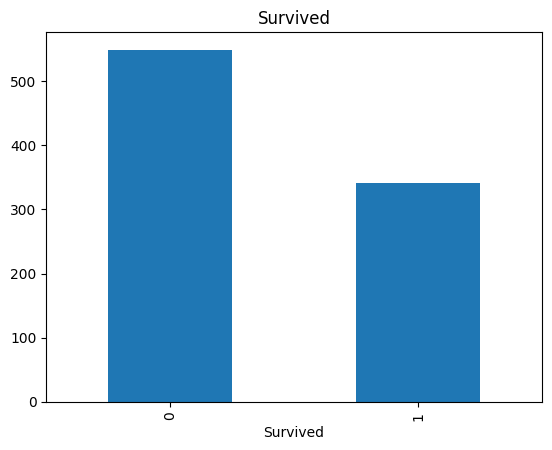

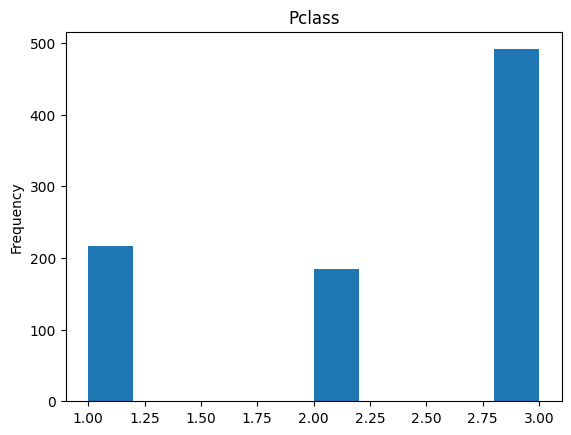

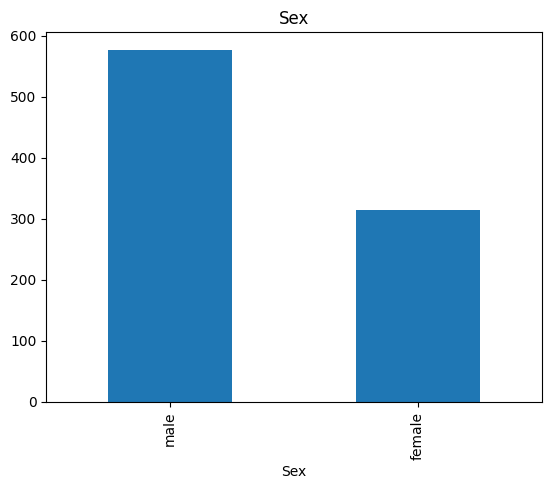

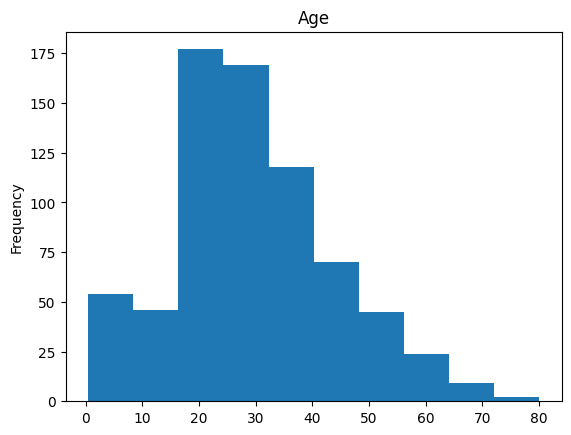

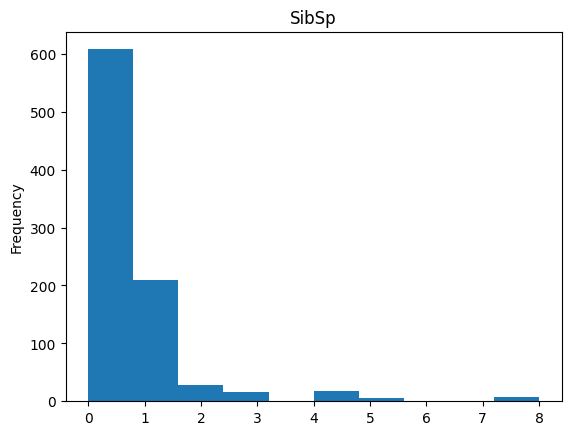

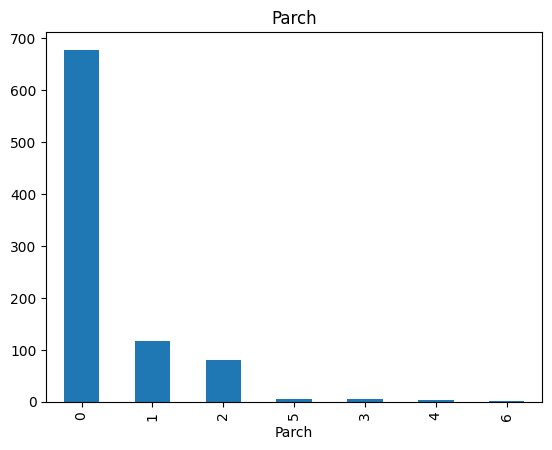

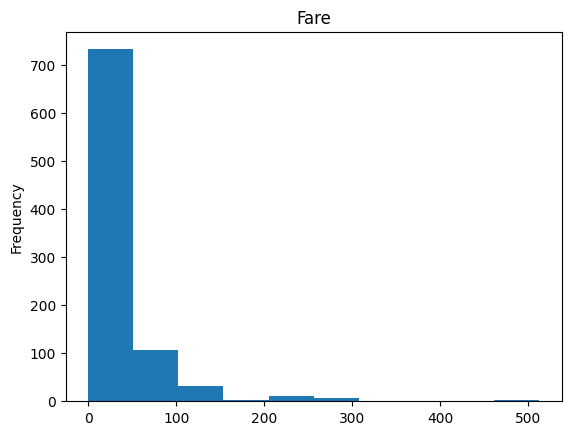

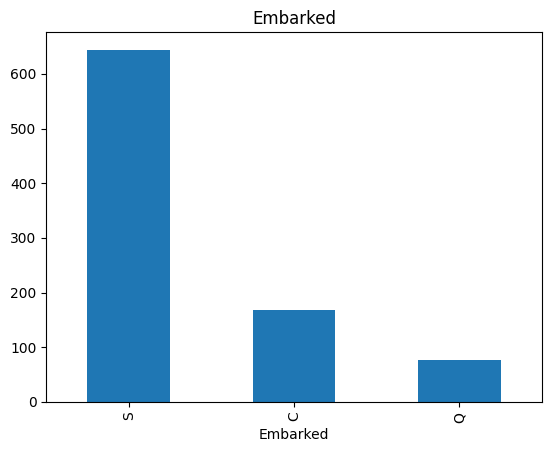

In [161]:
# con istrogramma -> df['Survived'].plot.hist(title='Survived')
df['Survived'].value_counts().plot.bar(title='Survived')
plt.show()

df['Pclass'].plot.hist(title='Pclass')
plt.show()

df['Sex'].value_counts().plot.bar(title='Sex')
plt.show()

df['Age'].plot.hist(title='Age')
plt.show()

df['SibSp'].plot.hist(title='SibSp')
plt.show()

df['Parch'].value_counts().plot.bar(title='Parch')
plt.show()

df['Fare'].plot.hist(title='Fare')
plt.show()

df['Embarked'].value_counts().plot.bar(title='Embarked')
plt.show()


<br>

## Esercizio 2

* Understand what may be the best option for measuring attribute centrality and dispersion (if needed) and compute them.
* Use a box plot to summarize the 'Fare' attribute. Do it again but grouping by the 'Survived' outcome. Does money buy safety (at least to some degree)?

In [162]:
print(f'Mode of the Survived attribute: {df['Survived'].mode()[0]}')
print(f'Mode of the Sex attribute: {df['Sex'].mode()[0]}')
print(f'Mode of the Embarked attribute: {df['Embarked'].mode()[0]}')
print(f'Mode of the PClass attribute: {df['Pclass'].mode()[0]}')
print()
print(f'Median and IQR for PClass attribute: {df['Pclass'].median()} [{df['Pclass'].quantile(0.25)},{df['Pclass'].quantile(0.75)}]')
print(f'Median and IQR for SibSp attribute {df["SibSp"].median()} [{df["SibSp"].quantile(0.25)},{df["SibSp"].quantile(0.75)}]')
print(f'Median and IQR for Parch attribute {df["Parch"].median()} [{df["Parch"].quantile(0.25)},{df["Parch"].quantile(0.75)}]')
print(f'Median and IQR for Fare attribute {df["Fare"].median()} [{df["Fare"].quantile(0.25)},{df["Fare"].quantile(0.75)}]')

Mode of the Survived attribute: 0
Mode of the Sex attribute: male
Mode of the Embarked attribute: S
Mode of the PClass attribute: 3

Median and IQR for PClass attribute: 3.0 [2.0,3.0]
Median and IQR for SibSp attribute 0.0 [0.0,1.0]
Median and IQR for Parch attribute 0.0 [0.0,0.0]
Median and IQR for Fare attribute 14.4542 [7.9104,31.0]


<Axes: title={'center': 'Fare'}, xlabel='Survived'>

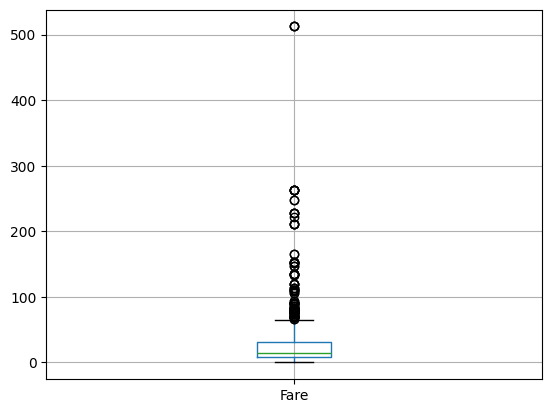

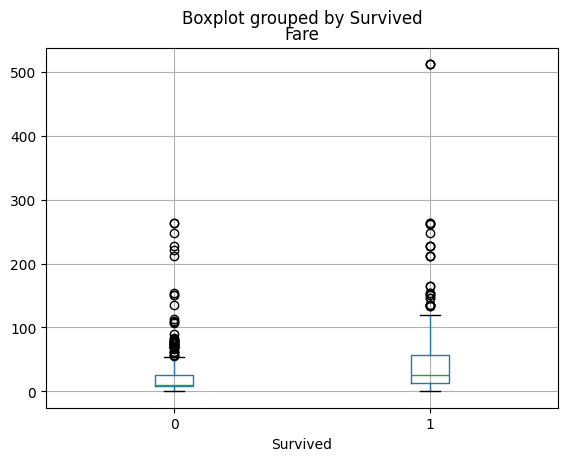

In [163]:
df.boxplot('Fare')
df.boxplot('Fare',by='Survived')

* Split the dataset into Male and Female passengers and display a qq-plot of the 'Fare' attribute comparing the two groups. What does it mean? Is it possible to find a simple reason why this is the result or not?


In [164]:
male_fares_m = df.loc[df['Sex'] == 'male']['Fare'].mean()
female_fares_m = df.loc[df['Sex'] == 'female']['Fare'].mean()

print(f'male: {male_fares_m} - female: {female_fares_m}')

male: 25.523893414211443 - female: 44.47981783439491


/var/folders/mz/2x3r_7v12sl_hfwrgd4nzpm00000gn/T/ipykernel_92800/2935370937.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  qqplot(male_fares,female_fares,c='r',alpha=0.5,edgecolor='k',rug=True)


Number of quantiles: 314


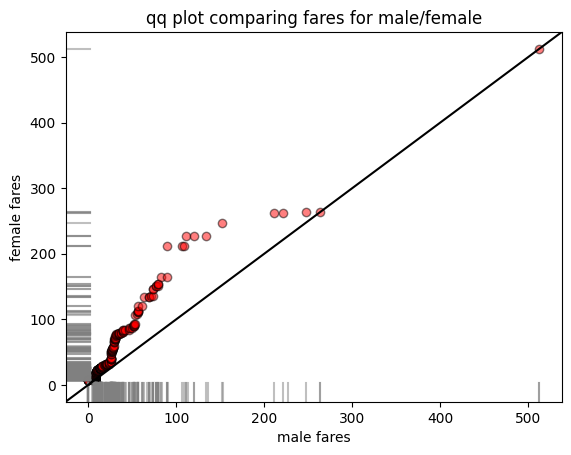

In [160]:
male_fares = df.loc[df['Sex'] == 'male']['Fare'].values
female_fares = df.loc[df['Sex'] == 'female']['Fare'].values

# draw q-q plot with rug plot
plt.figure()
qqplot(male_fares,female_fares,c='r',alpha=0.5,edgecolor='k',rug=True)
plt.xlabel('male fares')
plt.ylabel('female fares')
plt.title('qq plot comparing fares for male/female')
plt.show()
plt.close()

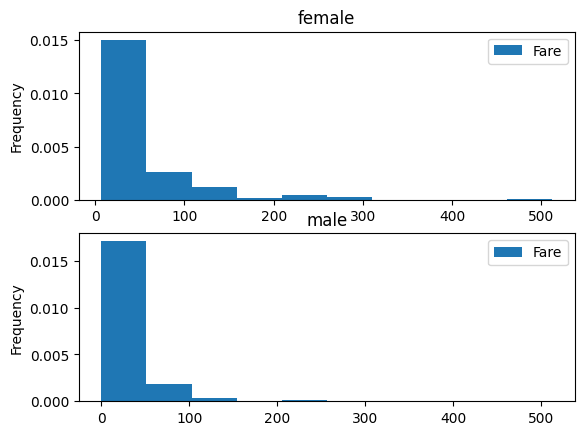

In [173]:
##Histograms confirm that female fares are higher than male fares
df.plot.hist(column=['Fare'], by='Sex', density=True)
plt.show()

In [180]:
male_df = df.loc[df['Sex'] == 'male']
female_df = df.loc[df['Sex'] == 'female']

print('Distribution of male passengers in the 3 classes: ')
print(male_df['Pclass'].value_counts()/len(male_df))

print('\nDistribution of the female passengers in the 3 classes: ')
print(female_df['Pclass'].value_counts()/len(female_df))

Distribution of male passengers in the 3 classes: 
Pclass
3    0.601386
1    0.211438
2    0.187175
Name: count, dtype: float64

Distribution of the female passengers in the 3 classes: 
Pclass
3    0.458599
1    0.299363
2    0.242038
Name: count, dtype: float64


Number of quantiles: 94


/var/folders/mz/2x3r_7v12sl_hfwrgd4nzpm00000gn/T/ipykernel_92800/1136365929.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  qqplot(male_fares,female_fares,c='r',alpha=0.5,edgecolor='k',rug=True)


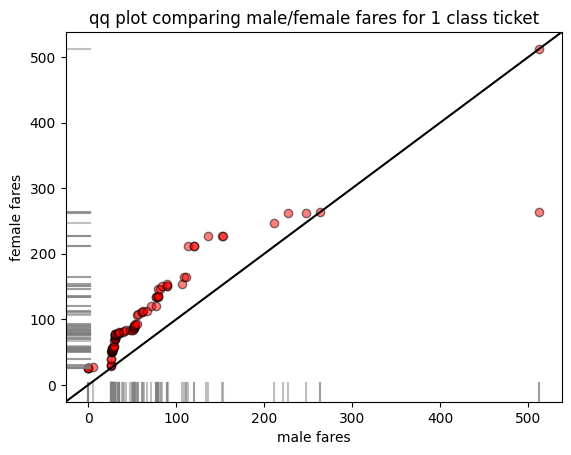

In [183]:
n_class = 1
male_fares = df.loc[(df['Sex'] == 'male')&(df['Pclass']==n_class)]['Fare'].values
female_fares = df.loc[(df['Sex'] == 'female')&(df['Pclass'] == n_class)]['Fare'].values 

plt.figure()
qqplot(male_fares,female_fares,c='r',alpha=0.5,edgecolor='k',rug=True)
plt.xlabel('male fares')
plt.ylabel('female fares')
plt.title(f'qq plot comparing male/female fares for {n_class} class ticket')
plt.show()
plt.close()

* Plot a stratified barplot: the barplot should have on the x axis the 'Embarked' attribute and be stratified by the 'Pclass' attribute. Given that C = Cherbourg (France) , Q = Queenstown (Ireland), S = Southampton (UK); which city had the highest percentage of emigrants from the lower social classes?


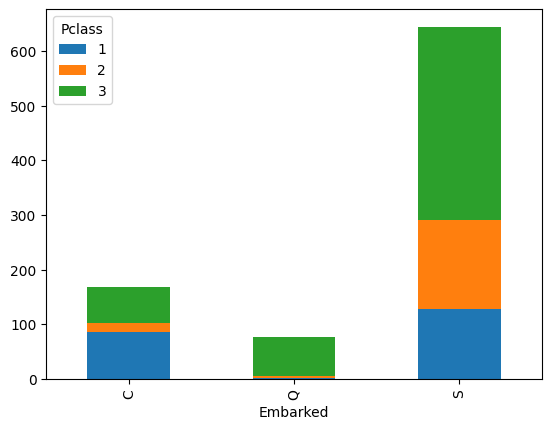

In [203]:
crosstab_df = pd.crosstab(df['Embarked'],df['Pclass']).reset_index()
crosstab_df.plot.bar(x='Embarked',stacked=True)
plt.show()

* Check whether  the 'Survived' attribute is correlated with 'Pclass' or 'Sex'.


In [210]:
contingency = pd.crosstab(df['Survived'], df['Sex'])
print(f'Contingency table for Survived and Sex:\n{contingency}')

from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency.values)
print(f'The expected values of contingency table would be:\n{expected}\n')
print(f'Chi2 value is {stat} while having {dof} degrees of freedom\n')

alpha = 0.05 
print(f'p-value is {p}')
if p <= alpha:
    print(f'Dependent (rejected H0)')
else:
    print('Independent (H0 holds true)')

Contingency table for Survived and Sex:
Sex       female  male
Survived              
0             81   468
1            233   109
The expected values of contingency table would be:
[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]

Chi2 value is 260.71702016732104 while having 1 degrees of freedom

p-value is 1.197357062775565e-58
Dependent (rejected H0)


In [214]:
contingency = pd.crosstab( df['Survived'],df['Pclass'])
print(f'Contingency table:\n{contingency}\n')  

from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency.values)
print(f'The expected values of contingency table would be: \n{expected}\n\
values of the contingency table if sex and Pclass variables were independent\n')
print(f'Chi2 value is {stat} while having {dof} degrees of freedom\n')

# interpret p-value
alpha = 0.05
print(f'p value is {p}')
if p <= alpha:
    print('Dependent (rejected H0)')
else:
    print('Independent (H0 holds true)')

Contingency table:
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

The expected values of contingency table would be: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]
values of the contingency table if sex and Pclass variables were independent

Chi2 value is 102.88898875696056 while having 2 degrees of freedom

p value is 4.549251711298793e-23
Dependent (rejected H0)


* Define a new attribute 'Children' (choose an Age threshold) and compute its correlation with 'Survival'.


In [228]:
# creates 'children' column, applies a boolean filter that returns T or F for every item that mathces the filter 
# then converts the boolean value into an int (0 | 1) and that is the final value of the 'children' column  
df['Children'] = (df['Age']<=14).astype(int)

# count number of children - only doing the sum of  values that are '1' (aka children)
children_number = df['Children'].sum()
print(f'Number of children: {children_number}\n')

contingency = pd.crosstab(df['Survived'], df['Children'])
print(f'Contingency table:\n{contingency}\n')

stat, p, dof, expected = chi2_contingency(contingency.values)
print(f'Expected contingency table:\n{expected}')

print(f'Chi2 value is {stat} while having {dof} degrees of freedom\n')
print(f'p-value: {p}')

alpha = 0.05
if p <= alpha:
    print('Dependent (H0 rejected)\n')
else:
    print('Independent (H0 holds true)\n')

Number of children: 77

Contingency table:
Children    0   1
Survived         
0         517  32
1         297  45

Expected contingency table:
[[501.55555556  47.44444444]
 [312.44444444  29.55555556]]
Chi2 value is 13.423911531709201 while having 1 degrees of freedom

p-value: 0.0002484371281795384
Dependent (H0 rejected)



* Check whether the 'Survived' attribute is correlated with 'Age', 'Fare', 'SibSp', or	'Parch'.


In [ ]:
from scipy.stats import pointbiserialr

attributes = ['Age', 'Fare', 'SibSp', 'Parch']
alpha = 0.05
for attribute in attributes:
    df_no_na = df[['Survived',attribute]].dropna()
    r,p_value = pointbiserialr(df_no_na['Survived'],df_no_na[attribute])
    if p_value < alpha:
        print(f'Result of the test is meaningful:\n\
Correlation between Survived and {attribute}: {r}\n')
    else:
        print(f'Result is not meaningful - no apparent correlation between Survived and {attribute}\n')


* Display a scatterplot between "Age" and "Fare" and compute correlation between them using multiple methods. Was the computation of correlation really needed in this case?